In [21]:
from os import path
from pydub import AudioSegment

src = 'audio/drum_samples/test/snare_03.mp3'
dst = 'audio/test.wav'

#Convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='audio/test.wav'>

In [29]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np

filename = "audio/simple_loop.wav"
ipd.Audio(filename) 

<class 'numpy.ndarray'> <class 'int'>


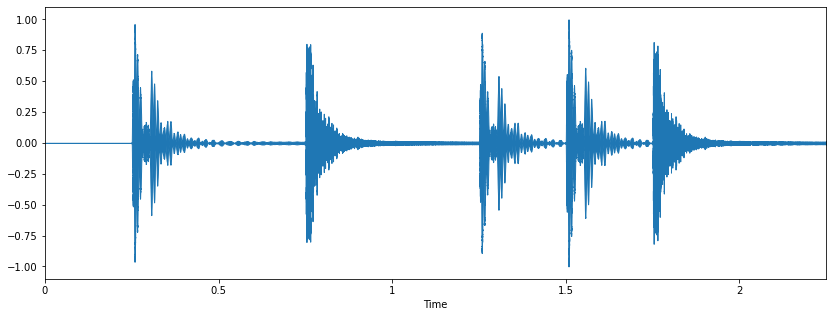

In [30]:
x , sr = librosa.load(filename)
print(type(x), type(sr))
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

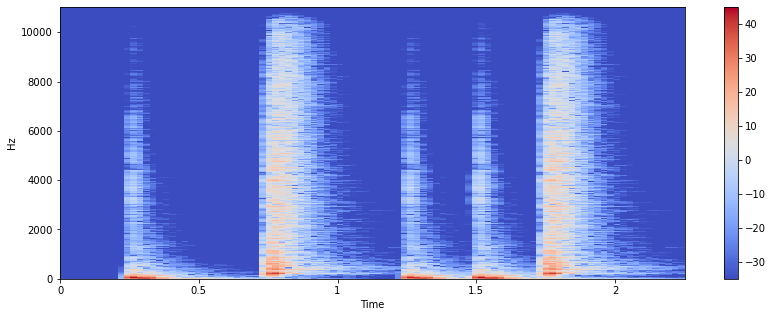

In [31]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Zero-crossing Rate: 
Rate of sign-changes (audio waveforms are relative and centered at zero). A key feature in classifying percussive sounds.

(1, 97)


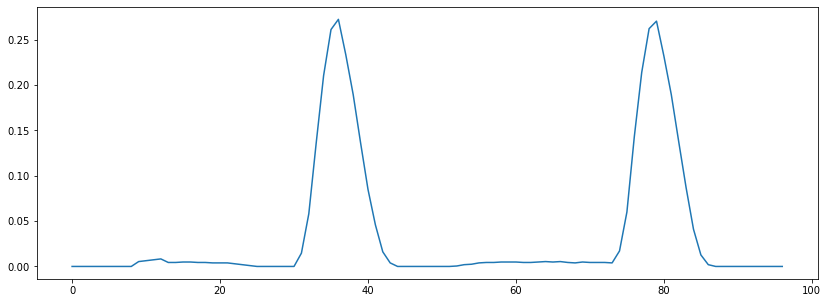

In [32]:
zcrs = librosa.feature.zero_crossing_rate(x+0.0001)
print(zcrs.shape)
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])

In [33]:
y, sr = librosa.load(filename)
hop_length = 512
y_harmonic, y_percussive = librosa.effects.hpss(y)
print (y_harmonic.shape,y_percussive.shape)
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
print( mfcc.shape)
mfcc_delta = librosa.feature.delta(mfcc)
print (mfcc_delta.shape)
chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
print (chromagram)


(49613,) (49613,)
(13, 97)
(13, 97)
[[0.07635791 0.07468913 0.06101349 ... 0.51791894 0.54671013 0.5957574 ]
 [0.09817693 0.09380133 0.08198663 ... 0.52826196 0.57810915 0.6395527 ]
 [0.16712204 0.14546499 0.11786117 ... 0.3812269  0.40547228 0.4434542 ]
 ...
 [0.5737301  0.4979963  0.40392834 ... 0.3624228  0.41373223 0.47679237]
 [0.1111663  0.1068705  0.1009909  ... 0.35338002 0.38866296 0.4601327 ]
 [0.03629912 0.06774282 0.09166939 ... 0.26859403 0.30377516 0.393141  ]]


C:\Users\ANUBHUTI\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=776
  warnings.warn(


C:\Users\ANUBHUTI\anaconda3\lib\site-packages\librosa\core\spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


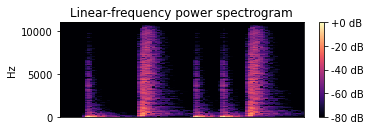

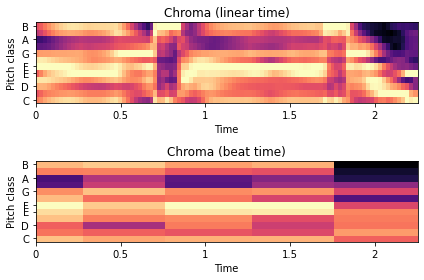

In [34]:
plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
C = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.figure()
tempo, beat_f = librosa.beat.beat_track(y=y, sr=sr, trim=False)
beat_f = librosa.util.fix_frames(beat_f, x_max=C.shape[1])
Csync = librosa.util.sync(C, beat_f, aggregate=np.median)
beat_t = librosa.frames_to_time(beat_f, sr=sr)
ax1 = plt.subplot(2,1,1)
librosa.display.specshow(C, y_axis='chroma', x_axis='time')
plt.title('Chroma (linear time)')
ax2 = plt.subplot(2,1,2, sharex=ax1)
librosa.display.specshow(Csync, y_axis='chroma', x_axis='time',x_coords=beat_t)
plt.title('Chroma (beat time)')
plt.tight_layout()
plt.show()

In [35]:
import librosa

def generatebeat(filename):
        
    y, sr = librosa.load(filename)
    #print(y.shape)
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    #print(beat_frames.shape)
    print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

    beat_times = librosa.frames_to_time(beat_frames, sr=sr)
    #print(beat_times.shape)
    return beat_times
def main():
    import pickle
    beat_times=generatebeat(filename)
    pickle.dump(beat_times,open('beattimes','wb'))
    
    pass

if __name__ == '__main__':
    main()

Estimated tempo: 123.05 beats per minute
